<a href="https://colab.research.google.com/github/KiplahD/Masters/blob/main/Top_50_Universities_in_the_US_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

df = pd.read_csv('/content/US_Top_50_Universities_2026.csv')
df.head()

,University_Name,National_Rank,Founded_Year,Institution_Type,State,Research_Impact_Score,Intl_Student_Ratio,Employment_Rate
0,Massachusetts Institute of Technology (MIT),1,1861,Private,MA,100.0,91.6,96.2
1,Columbia University,2,1754,Private,NY,95.9,83.7,92.1
2,Princeton University,3,1746,Private,NJ,99.0,70.0,94.5
3,Stanford University,4,1891,Private,CA,99.5,73.5,97.8
4,"University of California, Berkeley",5,1868,Public,CA,98.9,70.6,91.4


In [82]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   University_Name        50 non-null     object 
 1   National_Rank          50 non-null     int64  
 2   Founded_Year           50 non-null     int64  
 3   Institution_Type       50 non-null     object 
 4   State                  50 non-null     object 
 5   Research_Impact_Score  50 non-null     float64
 6   Intl_Student_Ratio     50 non-null     float64
 7   Employment_Rate        50 non-null     float64
dtypes: float64(3), int64(2), object(3)
memory usage: 3.3+ KB
None


In [83]:
#Create a list for Ivy league Schools
ivy_league_universities = [
    "Brown University",
    "Columbia University",
    "Cornell University",
    "Dartmouth College",
    "Harvard University",
    "University of Pennsylvania",
    "Princeton University",
    "Yale University"
]
print("Ivy League universities list created.")

Ivy League universities list created.


In [84]:
#Create a Category for Ivy League and other Private
df['Category'] = 'Other Private'
df.loc[df['University_Name'].isin(ivy_league_universities), 'Category'] = 'Ivy League'
print("Category column created and Ivy League universities categorized.")
df.head()

Category column created and Ivy League universities categorized.


,University_Name,National_Rank,Founded_Year,Institution_Type,State,Research_Impact_Score,Intl_Student_Ratio,Employment_Rate,Category
0,Massachusetts Institute of Technology (MIT),1,1861,Private,MA,100.0,91.6,96.2,Other Private
1,Columbia University,2,1754,Private,NY,95.9,83.7,92.1,Ivy League
2,Princeton University,3,1746,Private,NJ,99.0,70.0,94.5,Ivy League
3,Stanford University,4,1891,Private,CA,99.5,73.5,97.8,Other Private
4,"University of California, Berkeley",5,1868,Public,CA,98.9,70.6,91.4,Other Private


**Reasoning**:
Now I will categorize 'Top-tier Public' universities. These are identified by `Institution_Type_Public` being 1 and setting their 'Category' to 'Top-tier Public'.



In [85]:
#Add category for Top-tier Public universities
df.loc[df['Institution_Type'] == 'Public', 'Category'] = 'Top-tier Public'
print("Top-tier Public universities categorized.")
df.head(10)

Top-tier Public universities categorized.


,University_Name,National_Rank,Founded_Year,Institution_Type,State,Research_Impact_Score,Intl_Student_Ratio,Employment_Rate,Category
0,Massachusetts Institute of Technology (MIT),1,1861,Private,MA,100.0,91.6,96.2,Other Private
1,Columbia University,2,1754,Private,NY,95.9,83.7,92.1,Ivy League
2,Princeton University,3,1746,Private,NJ,99.0,70.0,94.5,Ivy League
3,Stanford University,4,1891,Private,CA,99.5,73.5,97.8,Other Private
4,"University of California, Berkeley",5,1868,Public,CA,98.9,70.6,91.4,Top-tier Public
5,Harvard University,6,1636,Private,MA,98.9,81.4,95.0,Ivy League
6,Williams College,7,1793,Private,MA,45.2,8.5,89.1,Other Private
7,Johns Hopkins University,8,1876,Private,MD,96.3,94.2,90.5,Other Private
8,Yale University,9,1701,Private,CT,97.2,72.7,93.3,Ivy League
9,University of Pennsylvania,10,1740,Private,PA,96.1,76.3,94.8,Ivy League


In [86]:
#Key Perfomance Metrics
metrics_to_average = ['National_Rank', 'Research_Impact_Score', 'Intl_Student_Ratio', 'Employment_Rate']
average_performance = df.groupby('Category')[metrics_to_average].mean()
print("Average performance metrics calculated for each category.")
print(average_performance)

Average performance metrics calculated for each category.
                 National_Rank  Research_Impact_Score  Intl_Student_Ratio  \
Category                                                                    
Ivy League            9.875000              93.712500            61.98750   
Other Private        26.518519              70.792593            39.07037   
Top-tier Public      32.000000              91.466667            45.38000   

                 Employment_Rate  
Category                          
Ivy League             92.900000  
Other Private          89.811111  
Top-tier Public        86.873333  


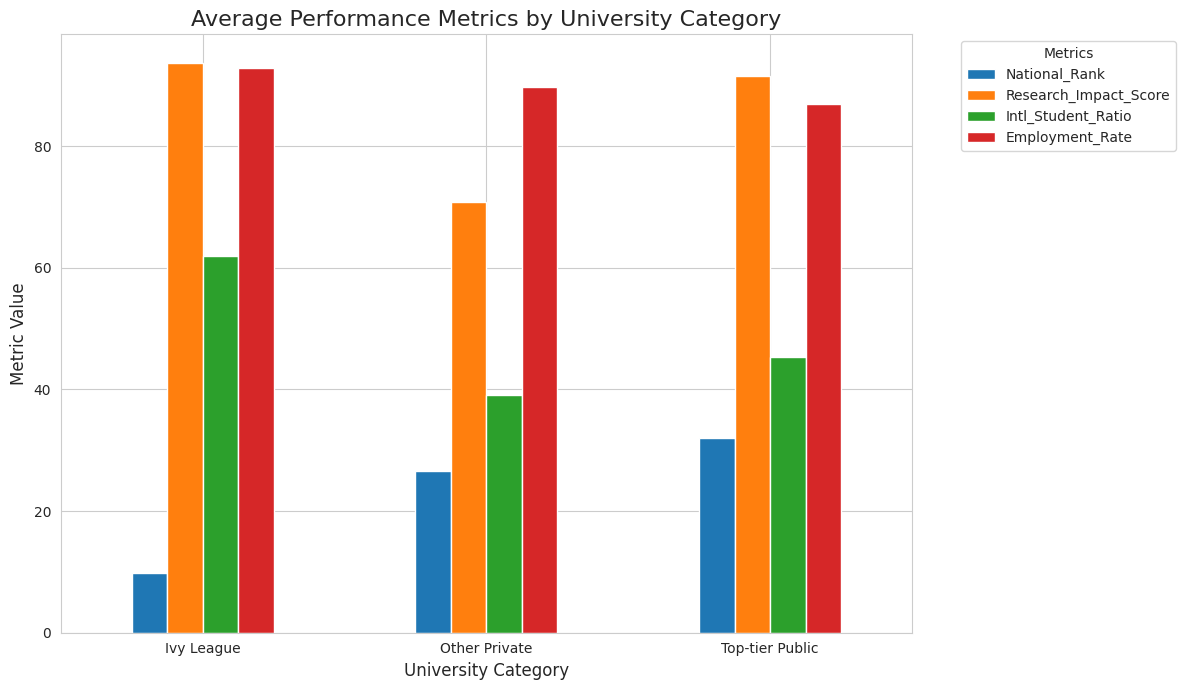

In [87]:
#Visualize Performance Comparison
ax = average_performance.plot(kind='bar', figsize=(12, 7), rot=0)

plt.title('Average Performance Metrics by University Category', fontsize=16)
plt.xlabel('University Category', fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [88]:
#Count Universities per State
universities_per_state = df.groupby('State').size()
print("Number of universities per state calculated:")
print(universities_per_state)

Number of universities per state calculated:
State
CA    11
CT     1
DC     1
FL     1
GA     2
IL     3
IN     1
MA     6
MD     2
ME     1
MI     1
MO     1
NC     2
NH     1
NJ     1
NY     4
PA     3
RI     1
TN     1
TX     2
UT     1
VA     2
WA     1
dtype: int64


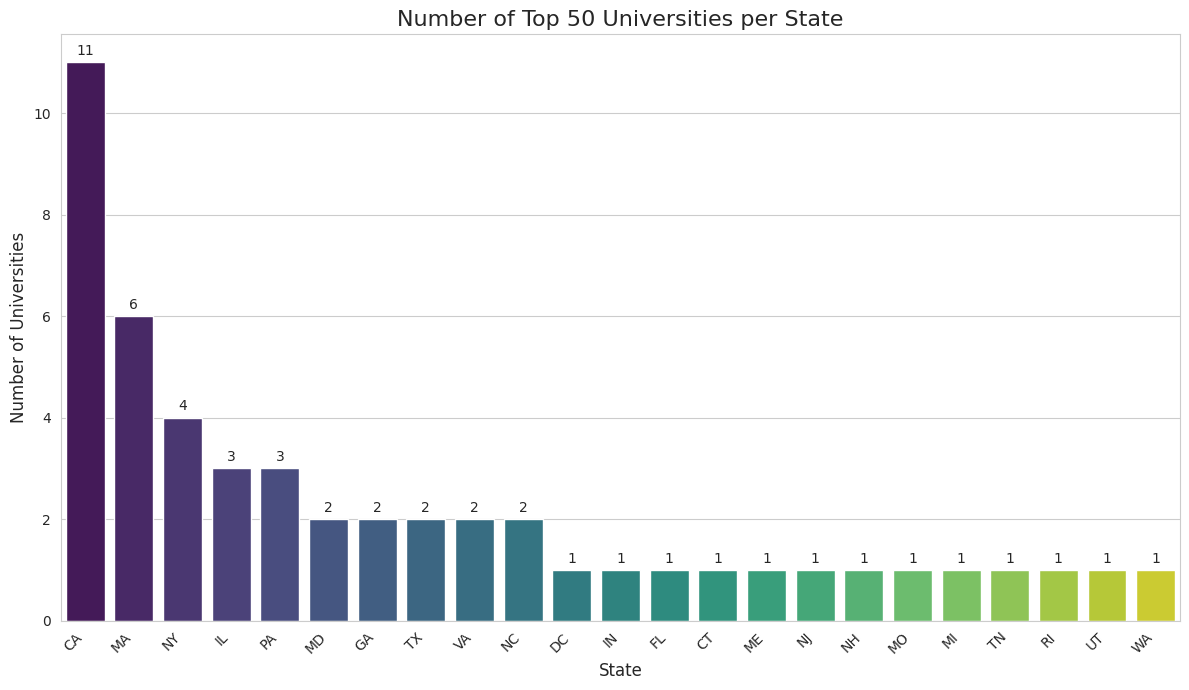

In [89]:
#Visualize Dominant States in Top 50
universities_per_state_sorted = universities_per_state.sort_values(ascending=False)

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=universities_per_state_sorted.index, y=universities_per_state_sorted.values, hue=universities_per_state_sorted.index, palette='viridis', legend=False)

plt.title('Number of Top 50 Universities per State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Universities', fontsize=12)
plt.xticks(rotation=45, ha='right')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

In [90]:
#Calculate Correlation
correlation_research_impact = df['Founded_Year'].corr(df['Research_Impact_Score'])
correlation_employment_rate = df['Founded_Year'].corr(df['Employment_Rate'])

print(f"Correlation between Founded_Year and Research_Impact_Score: {correlation_research_impact:.4f}")
print(f"Correlation between Founded_Year and Employment_Rate: {correlation_employment_rate:.4f}")

Correlation between Founded_Year and Research_Impact_Score: 0.0200
Correlation between Founded_Year and Employment_Rate: -0.3189


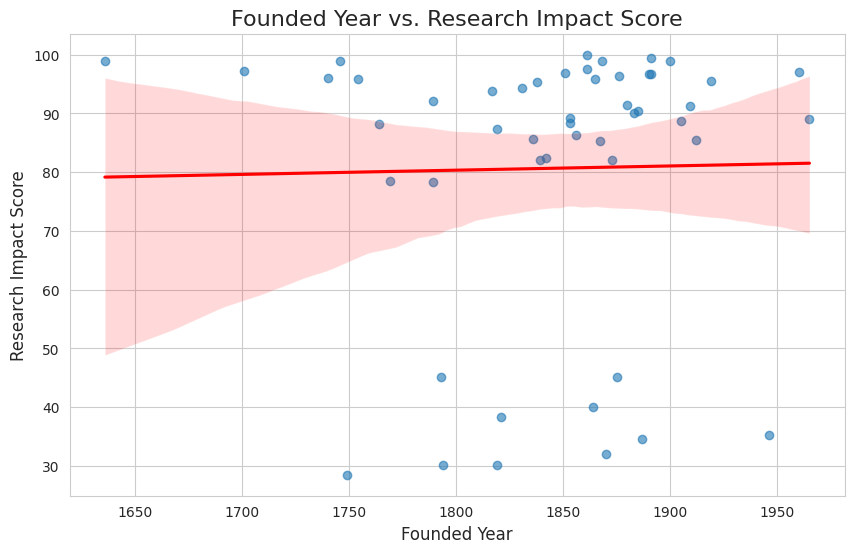

In [91]:
#Visualize Correlation
# Plot 1: Founded_Year vs. Research_Impact_Score
plt.figure(figsize=(10, 6))
sns.regplot(x='Founded_Year', y='Research_Impact_Score', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Founded Year vs. Research Impact Score', fontsize=16)
plt.xlabel('Founded Year', fontsize=12)
plt.ylabel('Research Impact Score', fontsize=12)
plt.grid(True)
plt.show()

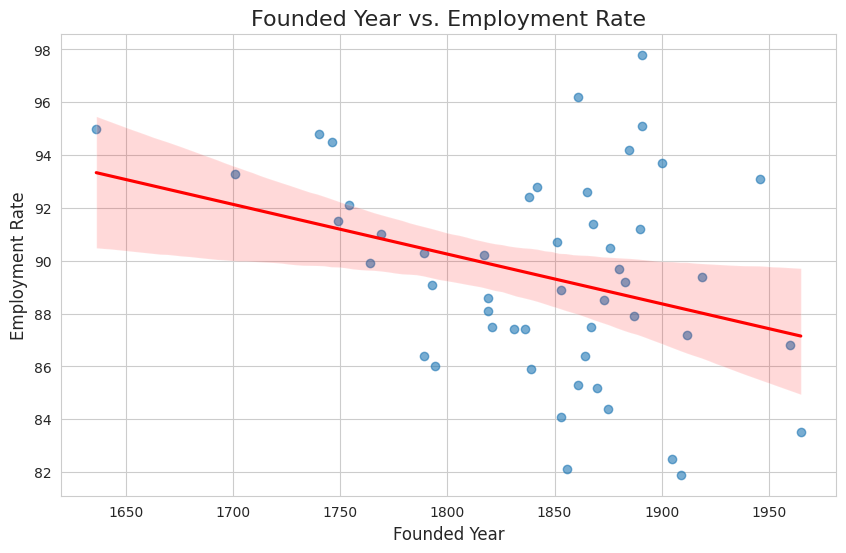

In [92]:
# Plot 2: Founded_Year vs. Employment_Rate
plt.figure(figsize=(10, 6))
sns.regplot(x='Founded_Year', y='Employment_Rate', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Founded Year vs. Employment Rate', fontsize=16)
plt.xlabel('Founded Year', fontsize=12)
plt.ylabel('Employment Rate', fontsize=12)
plt.grid(True)
plt.show()